# Simulate the striatum example network

This example continues ```striatum_example.ipynb``` and shows how to setup input and run the simulation.

### Simulation duration and number of cores

You can change the duration of the simulation, and the number of cores. 

__If you run on EBRAINS the memory available is limited, and the number of cores need to be reduced to 3 which increases runtime.__

In [1]:
duration = 1.5 # 3.5
n_cores = 4

%matplotlib inline

## Setup the input

Here we use the file ```input_config/striatum-test-input.json```.

The input can be generated in serial or in parallel. To generate it in parallel, pass ```rc``` parameter as in the previous examples.


In [2]:
import os
from snudda.input import SnuddaInput

network_path = os.path.join("networks", "striatum_example")
rc = None

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("input_config","striatum-test-input.json"),
                 verbose=False, rc=rc)
si.generate()
del si

Reading SNUDDA_DATA=/srv/main-spack-instance-2502/ebrains-spack-builds/vendor/spack/var/spack/environments/experimental/.spack-env/view/lib/python3.11/site-packages/snudda/data from networks/striatum_example/network-config.json
Writing spikes to networks/striatum_example/input-spikes.hdf5


## Plot synaptic input

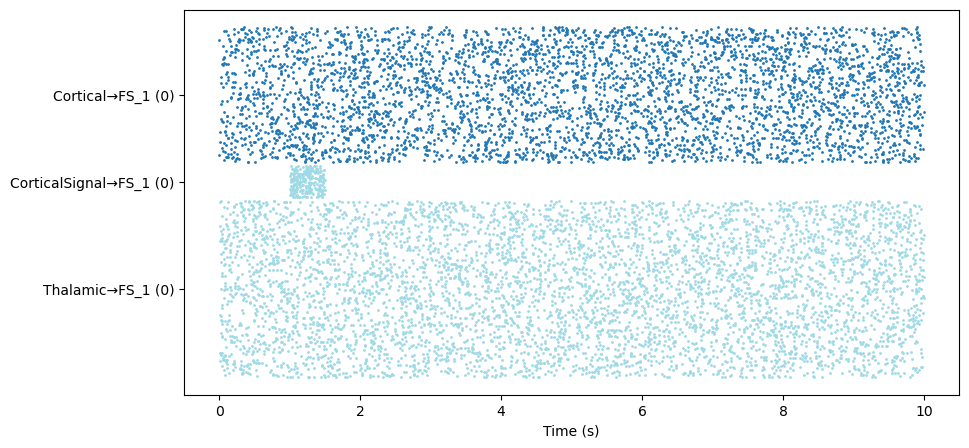

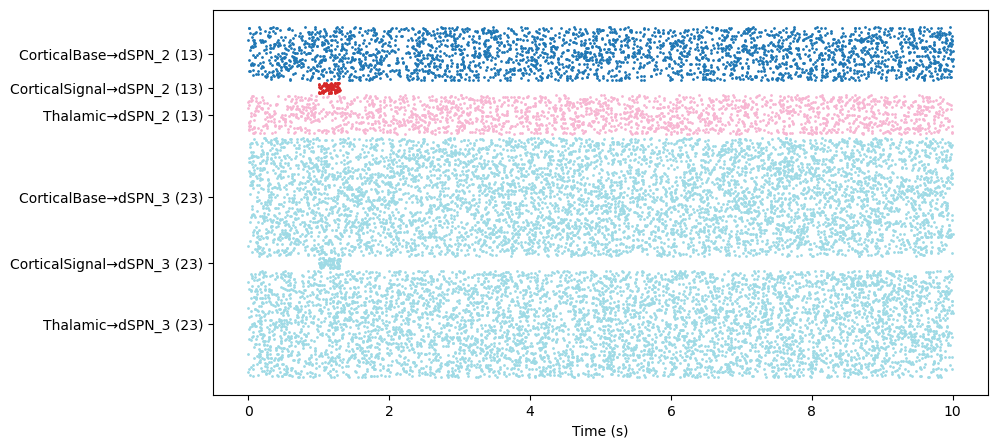

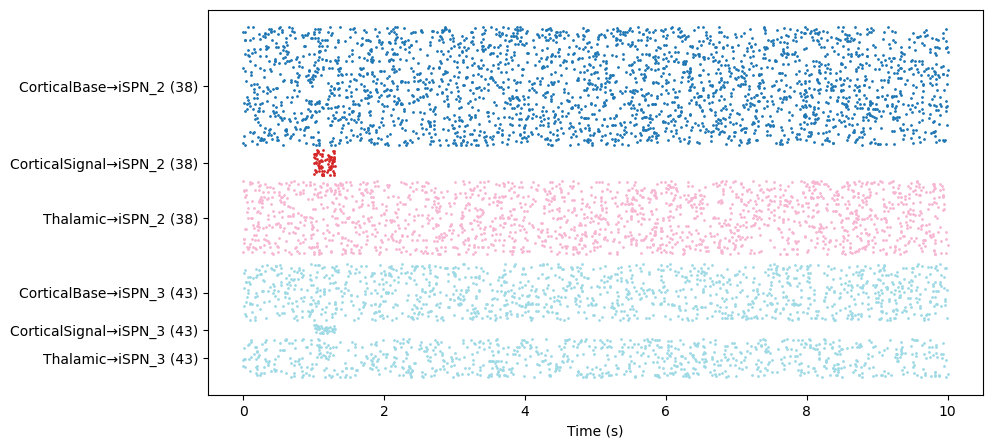

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path=network_path)
spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
spi.plot_input(neuron_type="iSPN", num_neurons=2)
del spi

## Clean up the memory...

In [4]:
import gc
gc.collect()

6402

## Run the neuron simulation

In [5]:
cmd = f"mpiexec -n {n_cores} snudda simulate {network_path} --time {duration}"
print(f"Running system command:\n\n{cmd}\n\nIf this goes instantly, please run it in the terminal instead.")
os.system(cmd)

Running system command:

mpiexec -n 4 snudda simulate networks/striatum_example --time 1.5

If this goes instantly, please run it in the terminal instead.
numprocs=4
args.ipython_profile = None
args: Namespace(action='simulate', path='networks/striatum_example', network_file=None, input_file=None, output_file=None, time=1.5, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, enable_rxd_neuromodulation=None, disable_rxd_neuromodulation=None, ipython_profile=None)
MPI Rank: 3, Size: 4
Using input file networks/striatum_example/input-spikes.hdf5
Reading SNUDDA_DATA=/srv/main-spack-instance-2502/ebrains-spack-builds/vendor/spack/var/spack/environments/experimental/.spack-env/view/lib/python3.11/site-packages/snudda/data from networks/striatum_example/network-config.json
NEURON mechanisms already compiled, make sure you have the correct vers

0

## Plotting

In [6]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadSimulation

sl = SnuddaLoad(network_path)

sim_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")

sls = SnuddaLoadSimulation(network_simulation_output_file=sim_file)

Loading networks/striatum_example/simulation/output.hdf5


### Plot voltage traces

In this example we are given 300 ms of cortical stimulation at 1 second.

Loading network info from networks/striatum_example/network-synapses.hdf5
Loading input info from networks/striatum_example/input-spikes.hdf5
Loading networks/striatum_example/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Plotted 50 traces (total 50)
Saving to figure /mnt/user/shared/Striatum Scaffold Model/networks/striatum_example/figures/Network-voltage-trace--ChIN-FS-dSPN-iSPN.pdf


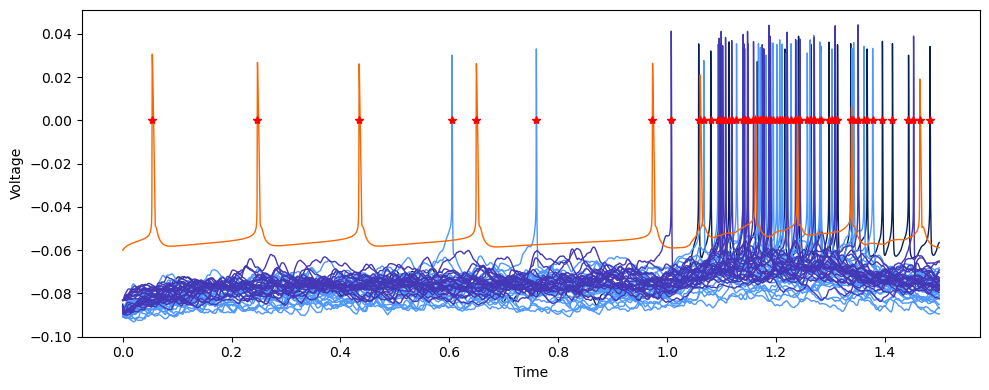

In [7]:
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file, network_file=network_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(0,1.5),fig_size=(10,4))

### Spike raster plot

Saving figure to networks/striatum_example/figures/spike-raster.png


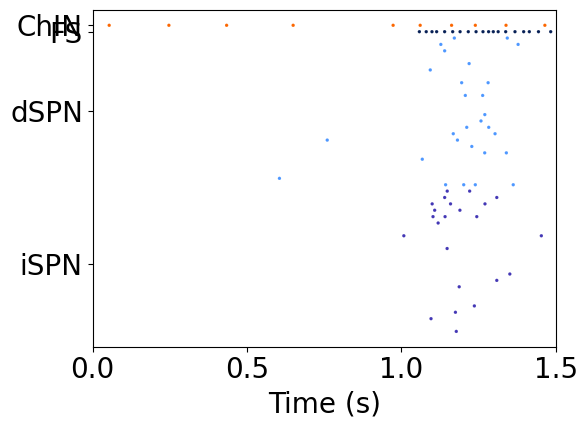

In [8]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=network_file,
                             simulation_file=sim_file,
                             snudda_load=sl, snudda_simulation_load=sls)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

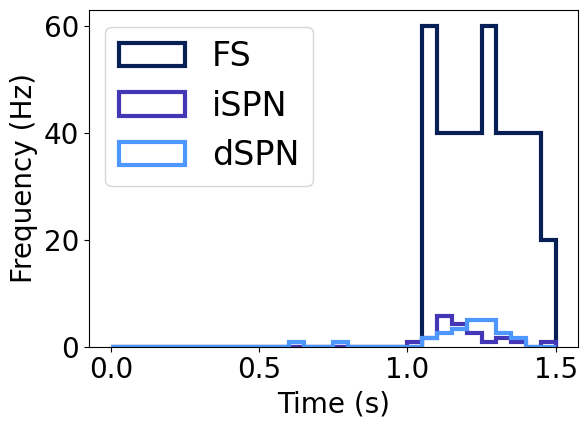

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [9]:
spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS"])